## Monte Carlo Simulation

Monte Carlo simulation is a numerical method for pricing options, especially when closed-form solutions (like Black-Scholes) are unavailable.

The main idea is to simulate thousands of possible future stock price paths based on a stochastic process (Geometric Brownian Motion), calculate the option payoff at maturity for each path, and then average the discounted payoffs to estimate the option's fair price.

### Key Steps:
1. Simulate many possible terminal stock prices using random samples from a normal distribution
2. Compute the option payoff for each simulated price
3. Average the payoffs and discount to present value using the risk-free rate


In [1]:
import sys
sys.path.append("../models")
from monte_carlo import monte_carlo_price

S = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

mc = monte_carlo_price(S, K, T, r, sigma, "call")
print(f"Monte Carlo Call Price: {mc:.2f}")

Monte Carlo Call Price: 10.84


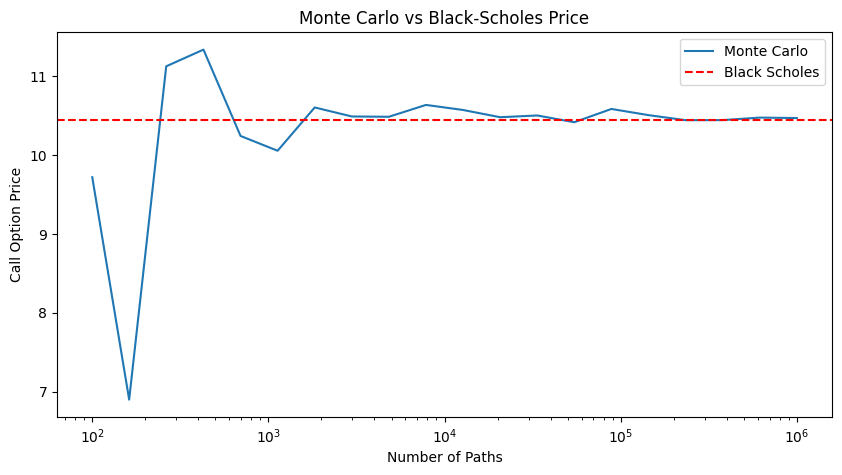

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from black_scholes import black_scholes_price

num_paths = np.logspace(2, 6, 20, dtype=int)
prices = [monte_carlo_price(S, K, T, r, sigma, "call", n_paths=n) for n in num_paths]

plt.figure(figsize=(10, 5))
plt.plot(num_paths, prices, label="Monte Carlo")
plt.xscale("log")
plt.axhline(black_scholes_price(S, K, T, r, sigma, "call"), color="r", linestyle="--", label="Black Scholes")
plt.title("Monte Carlo vs Black-Scholes Price")
plt.xlabel("Number of Paths")
plt.ylabel("Call Option Price")
plt.legend()
plt.grid(True)
plt.show()